In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
import os
import numpy as np
import pandas as pd

Load Data

In [3]:
train_df = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv")
test_df = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv")

Dimensions of the array

In [4]:
train_df.shape

(14731, 22)

In [5]:
train_df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [6]:
train_df.dtypes

HomePage                           float64
HomePage_Duration                  float64
LandingPage                        float64
LandingPage_Duration               float64
ProductDescriptionPage             float64
ProductDescriptionPage_Duration    float64
GoogleMetric:Bounce Rates          float64
GoogleMetric:Exit Rates            float64
GoogleMetric:Page Values           float64
SeasonalPurchase                   float64
Month_SeasonalPurchase              object
OS                                 float64
SearchEngine                       float64
Zone                               float64
Type of Traffic                    float64
CustomerType                        object
Gender                              object
Cookies Setting                     object
Education                           object
Marital Status                      object
WeekendPurchase                    float64
Made_Purchase                         bool
dtype: object

In [7]:
train_df['Made_Purchase'].value_counts()

False    9065
True     5666
Name: Made_Purchase, dtype: int64

In [8]:
dft = train_df.loc[(train_df['Made_Purchase'] == True)]
dft.shape

(5666, 22)

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, PowerTransformer, RobustScaler, QuantileTransformer, MaxAbsScaler
import numpy as np
from sklearn.impute import KNNImputer

Get Numeric columns

In [10]:
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

KNN imputer object

In [11]:
knn_imputer = KNNImputer(n_neighbors=10, missing_values=np.nan)

immpute missing values

In [12]:
train_df[numeric_cols] = knn_imputer.fit_transform(train_df[numeric_cols])

Mean immputation

In [13]:
train_df[numeric_cols] = knn_imputer.fit_transform(train_df[numeric_cols])
test_df[numeric_cols] = knn_imputer.transform(test_df[numeric_cols])

Categorical columns

In [14]:
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()

Create mode imputer object

In [15]:
mode_imputer = SimpleImputer(strategy='most_frequent')

Apply Mode immputation

In [16]:
train_df[cat_cols] = mode_imputer.fit_transform(train_df[cat_cols])
test_df[cat_cols] = mode_imputer.transform(test_df[cat_cols])

encode categorical columns

In [17]:
cols_to_encode = cat_cols

In [18]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [19]:
encoded_cols_train = encoder.fit_transform(train_df[cols_to_encode])
encoded_cols_test = encoder.transform(test_df[cols_to_encode])

Create dataframe

In [20]:
encoded_cols_train_df = pd.DataFrame(encoded_cols_train.toarray(), columns=encoder.get_feature_names_out(cols_to_encode))
encoded_cols_test_df = pd.DataFrame(encoded_cols_test.toarray(), columns=encoder.get_feature_names_out(cols_to_encode))

In [21]:
train_df = pd.concat([train_df, encoded_cols_train_df], axis=1)
test_df = pd.concat([test_df, encoded_cols_test_df], axis=1)

Drop the original columns

In [22]:
train_df.drop(cols_to_encode, axis=1, inplace=True)
test_df.drop(cols_to_encode, axis=1, inplace=True)

In [23]:
columns_to_scale = numeric_cols

Standard Scaler

In [24]:
scaler = PowerTransformer()

In [25]:
train_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])
test_df[columns_to_scale] = scaler.transform(test_df[columns_to_scale])

PCA

In [26]:
from sklearn.decomposition import PCA

In [27]:
columns_to_pca = numeric_cols

In [28]:
pca = PCA()

In [29]:
pca.fit(train_df[columns_to_pca])

PCA()

Plot Histogram

array([[<AxesSubplot:title={'center':'HomePage'}>,
        <AxesSubplot:title={'center':'HomePage_Duration'}>,
        <AxesSubplot:title={'center':'LandingPage'}>,
        <AxesSubplot:title={'center':'LandingPage_Duration'}>,
        <AxesSubplot:title={'center':'ProductDescriptionPage'}>,
        <AxesSubplot:title={'center':'ProductDescriptionPage_Duration'}>],
       [<AxesSubplot:title={'center':'GoogleMetric:Bounce Rates'}>,
        <AxesSubplot:title={'center':'GoogleMetric:Exit Rates'}>,
        <AxesSubplot:title={'center':'GoogleMetric:Page Values'}>,
        <AxesSubplot:title={'center':'SeasonalPurchase'}>,
        <AxesSubplot:title={'center':'OS'}>,
        <AxesSubplot:title={'center':'SearchEngine'}>],
       [<AxesSubplot:title={'center':'Zone'}>,
        <AxesSubplot:title={'center':'Type of Traffic'}>,
        <AxesSubplot:title={'center':'WeekendPurchase'}>,
        <AxesSubplot:title={'center':'Month_SeasonalPurchase_Aug'}>,
        <AxesSubplot:title={'center':'M

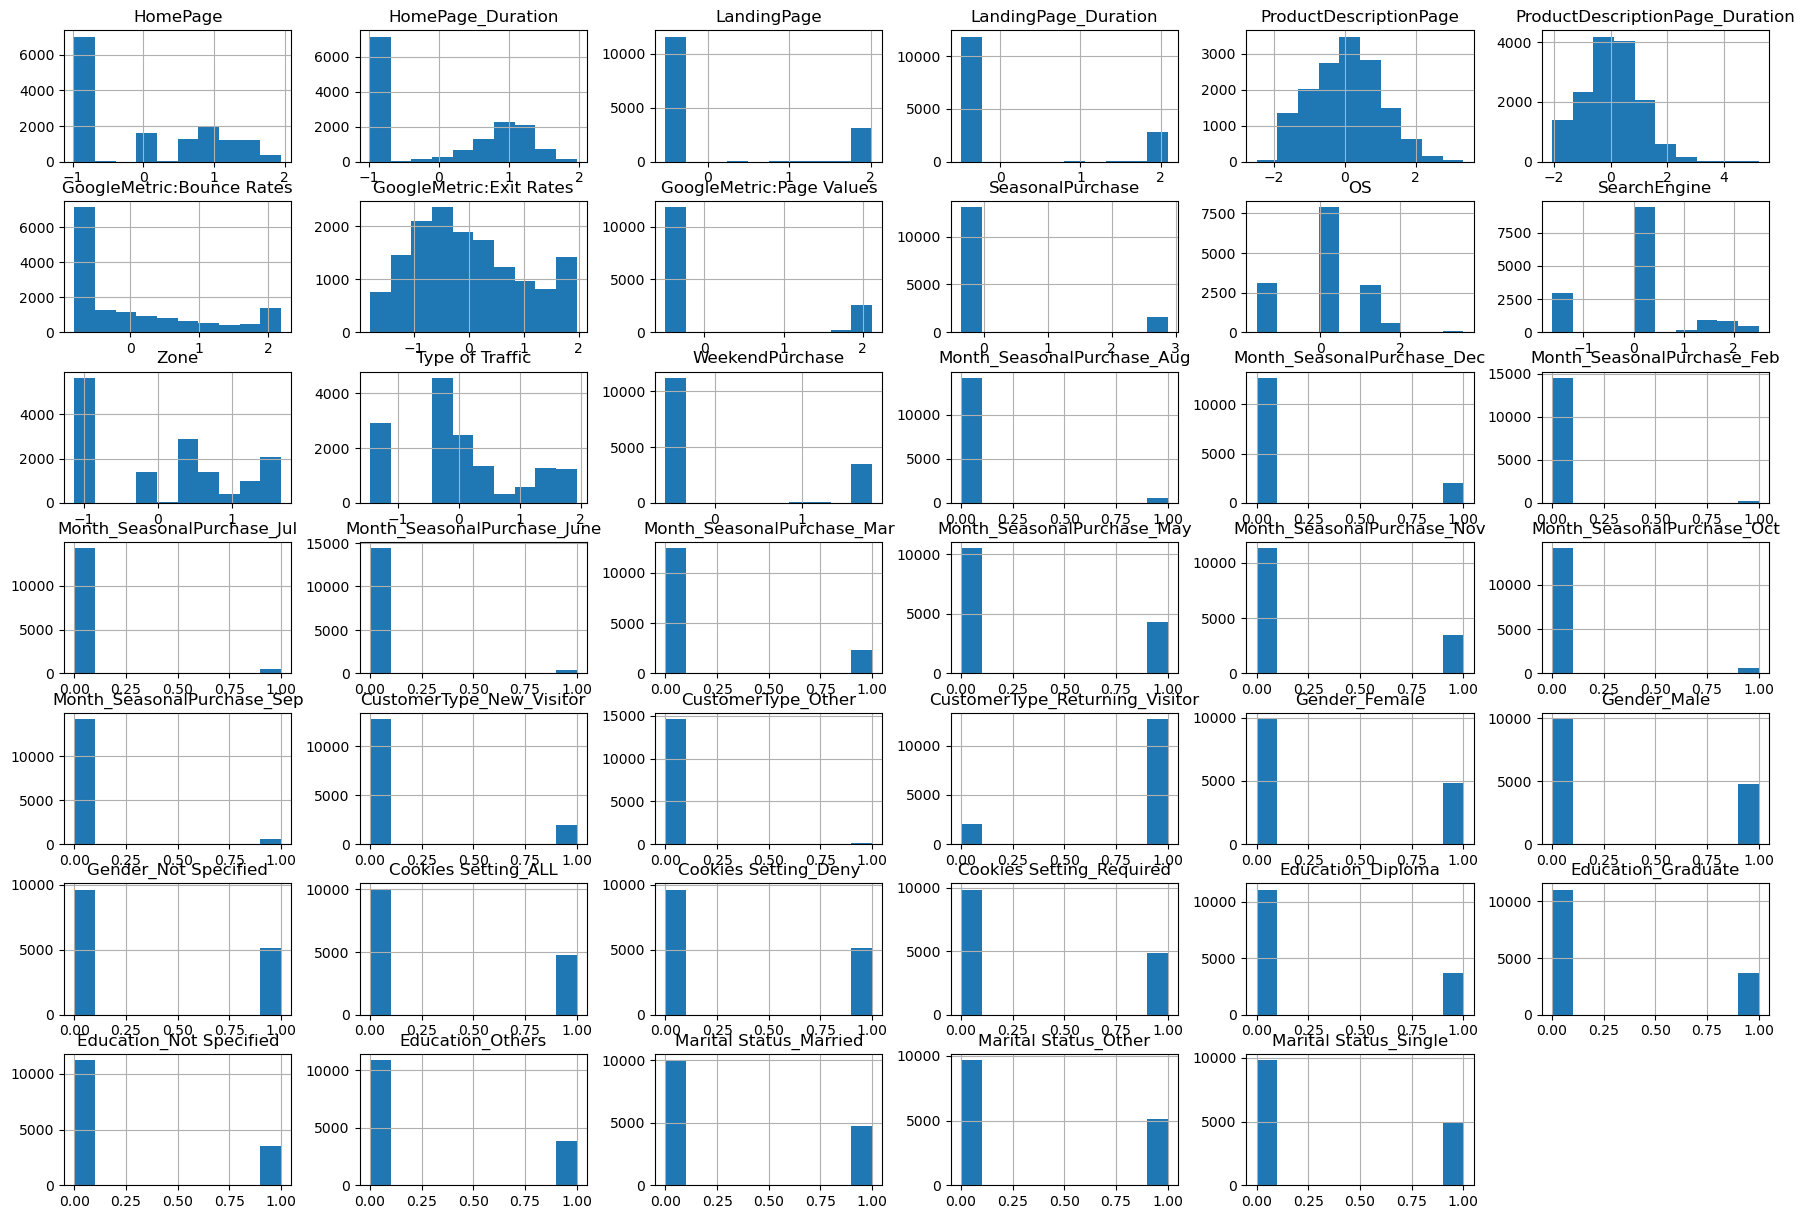

In [30]:
train_df.hist(train_df.columns, figsize=(22,15))

In [31]:
print(train_df.shape)
print(test_df.shape)

(14731, 42)
(6599, 41)


Plot the cumulative explained variance ratio

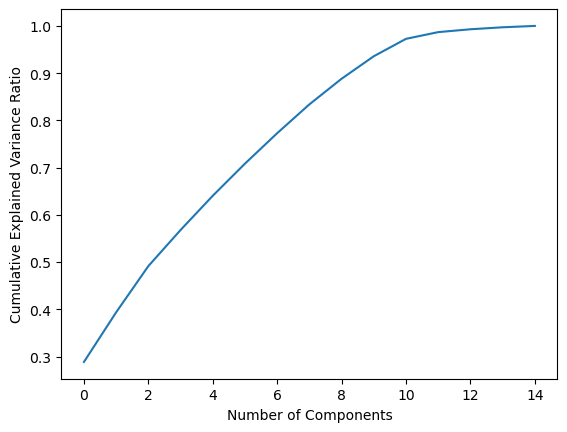

In [32]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

Determine 99% variance

In [33]:
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.99) + 1

In [34]:
pca = PCA(n_components=n_components)

In [35]:
train_df_pca = pd.DataFrame(pca.fit_transform(train_df[columns_to_pca]), columns=['PCA_' + str(i) for i in range(1, n_components+1)])
test_df_pca = pd.DataFrame(pca.transform(test_df[columns_to_pca]), columns=['PCA_' + str(i) for i in range(1, n_components+1)])

Add PCA column

In [36]:
train_df = pd.concat([train_df, train_df_pca], axis=1)
test_df = pd.concat([test_df, test_df_pca], axis=1)

In [37]:
train_df.drop(columns_to_pca, axis=1, inplace=True)
test_df.drop(columns_to_pca, axis=1, inplace=True)

In [38]:
xtrain = train_df.drop('Made_Purchase', axis='columns')
ytrain = train_df['Made_Purchase']

In [39]:
type(train_df)

pandas.core.frame.DataFrame

In [40]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

Bagging Classifier

In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_clf = DecisionTreeClassifier()
clf = BaggingClassifier(base_estimator=base_clf, n_estimators=10)
clf.fit(xtrain, ytrain)
ypred = clf.predict(test_df)

Boost Classifier

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_clf = DecisionTreeClassifier()
clf = AdaBoostClassifier(base_estimator=base_clf, n_estimators=10)
clf.fit(xtrain, ytrain)
ypred = clf.predict(test_df)

MLP classifier

In [43]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
clf.fit(xtrain, ytrain)
ypred = clf.predict(test_df)

In [44]:
x=train_df.drop("Made_Purchase",axis=1)
y=train_df['Made_Purchase'].copy()

In [45]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)

In [46]:
xtrain.describe()

,Month_SeasonalPurchase_Aug,Month_SeasonalPurchase_Dec,Month_SeasonalPurchase_Feb,Month_SeasonalPurchase_Jul,Month_SeasonalPurchase_June,Month_SeasonalPurchase_Mar,Month_SeasonalPurchase_May,Month_SeasonalPurchase_Nov,Month_SeasonalPurchase_Oct,Month_SeasonalPurchase_Sep,...,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13
count,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,...,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000
mean,0.034848,0.136043,0.014120,0.033671,0.023624,0.156680,0.288740,0.235880,0.040641,0.035753,...,0.002289,-0.002589,-0.002429,-0.005152,0.003393,-0.001293,0.002935,-0.004758,-0.000742,0.001439
std,0.183403,0.342849,0.117992,0.180390,0.151882,0.363515,0.453197,0.424567,0.197466,0.185682,...,1.064952,1.040826,1.007478,0.983102,0.960141,0.900916,0.847811,0.745900,0.459586,0.299319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.410530,-3.363893,-2.346400,-2.241496,-3.003931,-3.012685,-2.924000,-3.123175,-1.814343,-1.149611
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.722531,-0.700503,-0.688693,-0.856786,-0.698401,-0.632751,-0.583774,-0.250623,-0.273166,-0.197093
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.043002,-0.081178,-0.071150,0.010051,-0.052318,-0.009129,-0.028942,0.024287,0.042408,-0.024269
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.754640,0.616354,0.704685,0.760238,0.632042,0.621112,0.575175,0.321034,0.326090,0.170576
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.399824,4.049896,3.272648,2.960404,4.070948,3.084625,3.280749,3.764948,2.037434,1.806501


Dummy classifier

In [47]:
from sklearn.dummy import DummyClassifier
dummyC = DummyClassifier(strategy="uniform")
dummyC.fit(xtrain,ytrain)
dummyC.score(xtrain,ytrain)

0.4990948587979725

Confusion Matrix

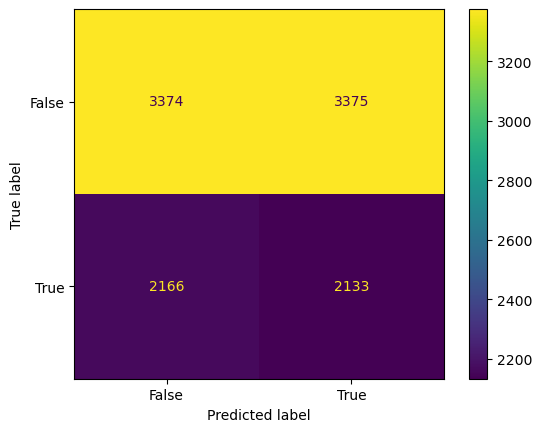

In [48]:
dummyC.score(xtest,ytest)
ypred = dummyC.predict(xtrain)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytrain, ypred)

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

In [50]:
xtrain, ytrain = shuffle(xtrain, ytrain, random_state=0)

LDA model

In [51]:
model1 = LDA()
model1.fit(xtrain, ytrain)

LinearDiscriminantAnalysis()

5 fold cross validation

In [52]:
scores1 = cross_val_score(model1, xtrain, ytrain, cv=5)

In [53]:
print('Cross-validation scores:', scores1)
print('Mean cross-validation score:', scores1.mean())

Cross-validation scores: [0.67013575 0.65701357 0.65746606 0.6645541  0.65414215]
Mean cross-validation score: 0.6606623254518229


In [54]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

In [55]:
xtrain, ytrain = shuffle(xtrain, ytrain, random_state=0)

In [56]:
model=VotingClassifier(estimators=[
    ('lr', LogisticRegression(solver='liblinear',penalty='l2', random_state=0) ),
    ('kn', KNeighborsClassifier(n_neighbors=50)),
    ],
    voting='soft')
model.fit(xtrain, ytrain)
res = cross_val_score(model, xtrain, ytrain, cv=35)

In [57]:
res.mean()

0.6611154166307873

fit model to training data

In [58]:
model.fit(xtrain, ytrain)  

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=0,
                                                 solver='liblinear')),
                             ('kn', KNeighborsClassifier(n_neighbors=50))],
                 voting='soft')

Random Forest CLassifier / hyperparameter tuning

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris

Load iris dataset

In [60]:
iris = load_iris()
X = iris.data
y = iris.target

Define hyperparameter grid

In [61]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

Instantiate random forest classifier

In [62]:
rf = RandomForestClassifier()

Instantiate randomized search CV

In [63]:
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    random_state=42
)

 Fit randomized search CV

In [64]:
random_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42)

In [65]:
print('Best parameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)

Best parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': False}
Best score: 0.9666666666666668


Predictions

In [66]:
ypred = model.predict(test_df)
ypred = ypred.astype(bool)
ypred

array([False, False, False, ..., False, False, False])

Submissions

In [67]:
submission=pd.DataFrame(columns=['id', 'Made_Purchase'])
submission['id']=[i for i in range(len(ypred))]
submission["Made_Purchase"]=[i for i in ypred]
submission.to_csv('submission.csv',index=False)

In [68]:
submission

,id,Made_Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
6594,6594,False
6595,6595,False
6596,6596,False
6597,6597,False
